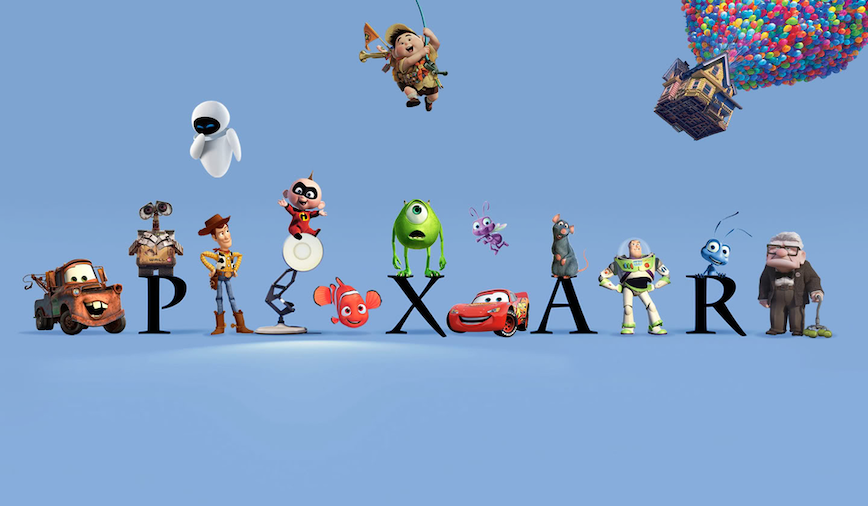

In [ ]:
from IPython.display import Image, display
display(Image("../img/pixar.png"))

# Ejemplo de WebScraping (Películas Pixar) - únicos fines educativos - Enero 2026

Descripción del ejercicio

En este Jupyter Notebook se presenta un ejemplo práctico de web scraping aplicado a una base de datos que ya tenemos, y queremos enriquecer.

Nos podemos encontrar bases de datos con nulos, de hecho será lo normal. La gestión de nulos tiene una gran relevancia y como abordamos
su solución.

En este caso son pocos datos, y se podría incluso para un caso aislado, rellenar a mano.

Pero vamos a ver en este ejercicio, como hacerlo a través de un web scrapping...que nos permitiría diseñar un modelo escalable y automatizado.

Debe tenerse en cuenta que el código es susceptible a cambios, ya que cualquier modificación en la estructura de la página web (HTML, clases CSS, identificadores, etc.) puede requerir ajustes en el código para que el proceso de extracción continúe funcionando correctamente.

In [ ]:
import pandas as pd

df =pd.read_csv("../files/archivo_pixar.csv", index_col=0)

#La fuente de este csv es Kaggle

In [2]:
df.head()

,ID,film,film_rating,cinema_score,release_date,run_time,budget
0,1,Toy Story,G,A,1995-11-22,81,30000000
1,2,A Bug's Life,G,A,1998-11-25,95,120000000
2,3,Toy Story 2,G,A+,1999-11-24,92,90000000
3,4,"Monsters, Inc.",G,A+,2001-11-02,92,115000000
4,5,Buscando a Nemo,G,A+,NaN,100,94000000


In [ ]:
# Tengo nulos en la fecha...podríamos intentar hacer un web scrapping a través del título de las películas

In [3]:
porcentaje_nulos = df['release_date'].isna().mean() * 100
print(f"Porcentaje de nulos en 'run_time': {porcentaje_nulos:.2f}%")

Porcentaje de nulos en 'run_time': 25.00%


In [4]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time

# Configuración de Selenium
chrome_options = Options()
chrome_options.add_argument("--headless")  
driver = webdriver.Chrome(options=chrome_options)

# Abrir Wikipedia
url = "https://es.wikipedia.org/wiki/Anexo:Pel%C3%ADculas_de_Pixar"
driver.get(url)
time.sleep(2)  # esperar a que cargue la página

# Número máximo de filas en la tabla
num_rows = 100  # suficiente para cubrir todas las películas

for i in range(1, num_rows + 1):
    try:
        # Selector CSS del título de la película
        title_selector = f"#mw-content-text > div.mw-content-ltr.mw-parser-output > table:nth-child(6) > tbody > tr:nth-child({i}) > th > i > a"
        title_elem = driver.find_element(By.CSS_SELECTOR, title_selector)
        wiki_title = title_elem.text.strip()

        # Selector CSS de la fecha
        date_selector = f"#mw-content-text > div.mw-content-ltr.mw-parser-output > table:nth-child(6) > tbody > tr:nth-child({i}) > td:nth-child(3)"
        date_elem = driver.find_element(By.CSS_SELECTOR, date_selector)
        wiki_date = date_elem.text.strip()

        # Buscar en el DataFrame solo los que tienen NaN en release_date
        mask = (df['film'].str.lower() == wiki_title.lower()) & (df['release_date'].isna())
        if mask.any():
            df.loc[mask, 'release_date'] = wiki_date

    except:
        # Ignorar filas que no existen o no tengan datos
        continue

driver.quit()
print(df)


    ID                 film film_rating cinema_score             release_date  \
0    1            Toy Story           G            A               1995-11-22   
1    2         A Bug's Life           G            A               1998-11-25   
2    3          Toy Story 2           G           A+               1999-11-24   
3    4       Monsters, Inc.           G           A+               2001-11-02   
4    5      Buscando a Nemo           G           A+       30 de mayo de 2003   
5    6      The Incredibles          PG           A+               2004-11-05   
6    7                 Cars           G            A       9 de junio de 2006   
7    8          Ratatouille           G            A      29 de junio de 2007   
8    9               WALL·E           G            A      27 de junio de 2008   
9   10                   Up          PG           A+               2009-05-29   
10  11          Toy Story 3           G            A               2010-06-18   
11  12               Cars 2 

In [5]:
porcentaje_nulos = df['release_date'].isna().mean() * 100
print(f"Porcentaje de nulos en 'run_time': {porcentaje_nulos:.2f}%")

Porcentaje de nulos en 'run_time': 0.00%


Ahora podemos poner todas las fechas en el mismo formato, para normalizarlo:

dateparser (a veces escrito por error como datapraser) es una librería de Python especializada en interpretar fechas escritas en lenguaje natural, incluso cuando están en distintos idiomas y formatos.

In [ ]:
import dateparser

df["release_date"] = df["release_date"].apply(lambda x: dateparser.parse(x).strftime("%Y-%m-%d"))

In [10]:
df.head(28)

,ID,film,film_rating,cinema_score,release_date,run_time,budget
0,1,Toy Story,G,A,1995-11-22,81,30000000
1,2,A Bug's Life,G,A,1998-11-25,95,120000000
2,3,Toy Story 2,G,A+,1999-11-24,92,90000000
3,4,"Monsters, Inc.",G,A+,2001-11-02,92,115000000
4,5,Buscando a Nemo,G,A+,2003-05-30,100,94000000
5,6,The Incredibles,PG,A+,2004-11-05,115,92000000
6,7,Cars,G,A,2006-06-09,116,120000000
7,8,Ratatouille,G,A,2007-06-29,111,150000000
8,9,WALL·E,G,A,2008-06-27,98,180000000
9,10,Up,PG,A+,2009-05-29,96,175000000
